Iris dataset in scikit-learn

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
import matplotlib.pyplot as plt
from random import random

In [ ]:
iris = datasets.load_iris()
X = iris.data
target = iris.target
Y = to_categorical(target, dtype ="uint8")

# Regression

## Función común

In [ ]:
def eval_funct(w, x, y, z):
  h = w[0] + w[1]*x +w[2]*y + w[3]*z
  return h

## Dividir Variables

In [ ]:
n = X.shape[0]
X_0 = [X[i][0] for i in range(n)]
X_1 = [X[i][1] for i in range(n)]
X_2 = [X[i][2] for i in range(n)]
X_3 = [X[i][3] for i in range(n)]

### Predecir primera (X_0)

In [ ]:
NUM_PUNTOS = n
alpha = 0.015
epochs = 150

w = list()
for _ in range(4):
  w.append(random())

In [ ]:
H = list()
error = []
for e in range(epochs):
  suma = 0
  for i in range(NUM_PUNTOS):
    x_v = [1, X_1[i], X_2[i], X_3[i]]
    h = eval_funct(w, X_1[i], X_2[i], X_3[i])
    for j in range(4):
      w[j] = w[j] + alpha * (X_0[i] - h )* (x_v[j])

  for i in range(NUM_PUNTOS):
    suma += (eval_funct(w, X_1[i], X_2[i], X_3[i])- X_0[i])**2

  error.append((1/2)*suma)

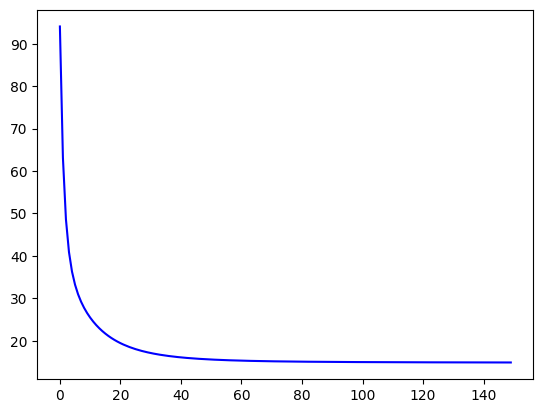

In [ ]:
# IMPRIMIR FUNCION DE ERROR:
x_error = [i for i in range(epochs)]
plt.plot(x_error, error, 'b')
plt.show()

### Predecir segunda (X_1)

In [ ]:
NUM_PUNTOS = n
alpha = 0.00175
epochs = 80

w = list()
for _ in range(4):
  w.append(random())

In [ ]:
H = list()
error = []
for e in range(epochs):
  suma = 0
  for i in range(NUM_PUNTOS):
    x_v = [1, X_0[i], X_2[i], X_3[i]]
    h = eval_funct(w, X_0[i], X_2[i], X_3[i])
    for j in range(4):
      w[j] = w[j] + alpha * (X_1[i] - h )* (x_v[j])

  for i in range(NUM_PUNTOS):
    suma += (eval_funct(w, X_0[i], X_2[i], X_3[i])- X_1[i])**2

  error.append((1/2)*suma)

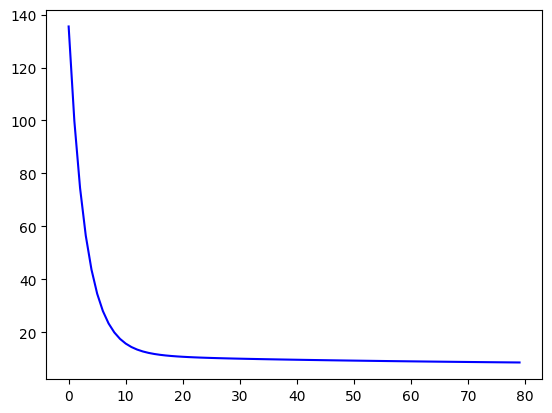

In [ ]:
# IMPRIMIR FUNCION DE ERROR:
x_error = [i for i in range(epochs)]
plt.plot(x_error, error, 'b')
plt.show()

### Predecir tercera variable (X_2)

In [ ]:
NUM_PUNTOS = n
alpha = 0.031
epochs = 80

w = list()
for _ in range(4):
  w.append(random())

In [ ]:
H = list()
error = []
for e in range(epochs):
  suma = 0
  for i in range(NUM_PUNTOS):
    x_v = [1, X_0[i], X_1[i], X_3[i]]
    h = eval_funct(w, X_0[i], X_1[i], X_3[i])
    for j in range(4):
      w[j] = w[j] + alpha * (X_2[i] - h )* (x_v[j])

  for i in range(NUM_PUNTOS):
    suma += (eval_funct(w, X_0[i], X_1[i], X_3[i])- X_2[i])**2

  error.append((1/2)*suma)

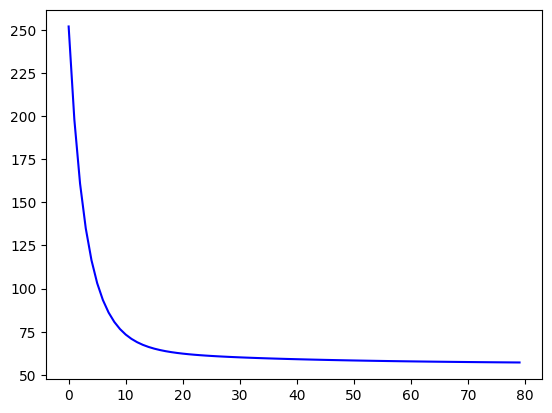

In [ ]:
# IMPRIMIR FUNCION DE ERROR:
x_error = [i for i in range(epochs)]
plt.plot(x_error, error, 'b')
plt.show()

In [ ]:
### Predecir cuarta variable (X_3)

In [ ]:
NUM_PUNTOS = n
alpha = 0.001
epochs = 50

w = list()
for _ in range(4):
  w.append(random())

In [ ]:
H = list()
error = []
for e in range(epochs):
  suma = 0
  for i in range(NUM_PUNTOS):
    x_v = [1, X_0[i], X_1[i], X_2[i]]
    h = eval_funct(w, X_0[i], X_1[i], X_2[i])
    for j in range(4):
      w[j] = w[j] + alpha * (X_3[i] - h )* (x_v[j])

  for i in range(NUM_PUNTOS):
    suma += (eval_funct(w, X_0[i], X_1[i], X_2[i])- X_3[i])**2

  error.append((1/2)*suma)

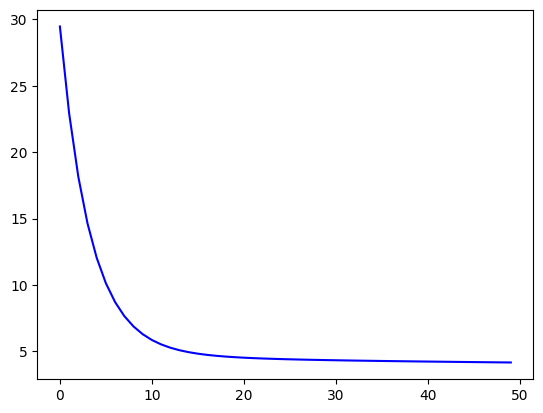

In [ ]:
# IMPRIMIR FUNCION DE ERROR:
x_error = [i for i in range(epochs)]
plt.plot(x_error, error, 'b')
plt.show()

# Clasificación binaria

## Setosa y Versicolour

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def eval_funct(w, x, y):
  h = w[0] + w[1]*x +w[2]*y
  return h

In [ ]:
def logistic_funct(h):
  g = 1/(1+np.exp(-h))
  return g

In [ ]:
x = [X[i][0] for i in range(n) if target[i]!=2]
y = [X[i][1] for i in range(n) if target[i]!=2]
t = [target[i] for i in range(n) if target[i]!=2]
x_versicolour = [X[i][0] for i in range(n) if target[i]==1]
x_setosa = [X[i][0] for i in range(n) if target[i]==0]
y_versicolour = [X[i][1] for i in range(n) if target[i]==1]
y_setosa = [X[i][1] for i in range(n) if target[i]==0]

In [ ]:
NUM_PUNTOS = len(x)
alpha = 0.3
epochs = 10000

w = list()
for _ in range(3):
  w.append(random()-0.5)

In [ ]:
for e in range(epochs):
  for i in range(NUM_PUNTOS):
    x_v = [1, x[i], y[i]]
    h = eval_funct(w, x[i], y[i])
    g = logistic_funct(h)
    for j in range(3):
      w[j] = w[j] + alpha * (t[i] - g )* (x_v[j])

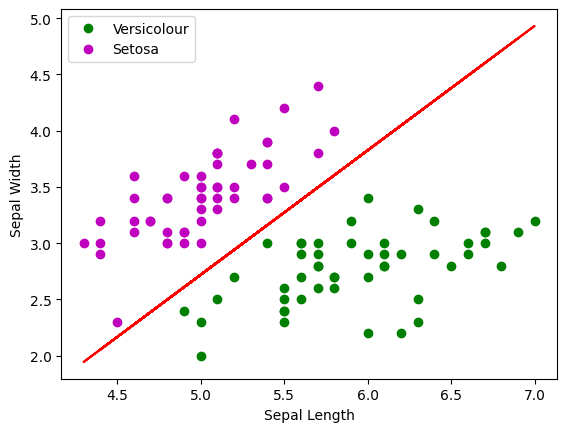

In [ ]:
y_model = [-(w[0]+w[1]*element)/w[2] for element in x]

plt.plot(x, y_model, 'r-')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.plot(x_versicolour, y_versicolour, "go", label = "Versicolour")
plt.plot(x_setosa, y_setosa, "mo", label = "Setosa")
plt.legend(loc = "best")
plt.show()